In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

from matplotlib import cm

In [6]:
output_path = Path('outputs_lab3')

data = {}

run_types = []

run_type_map = {
    '0': 'default',
    '1': 'same values',
    '2': 'manual tuning',
    '3': 'dynamic weights',
}

for f in output_path.iterdir():
    name_split = f.name.split('_')
    run_type = name_split[1]
    run_type_name = run_type_map[run_type]

    if run_type_name not in run_types:
        run_types.append(run_type_name)

    if run_type_name not in data:
        data[run_type_name] = {
            'std': [],
            'max': [],
            'runtime': []
        }

    run_data = pd.read_csv(f)

    data[run_type_name]['std'].append(run_data.stdev.to_numpy())
    data[run_type_name]['max'].append(run_data['max'].to_numpy())
    data[run_type_name]['runtime'].append(run_data['runtime'][0])

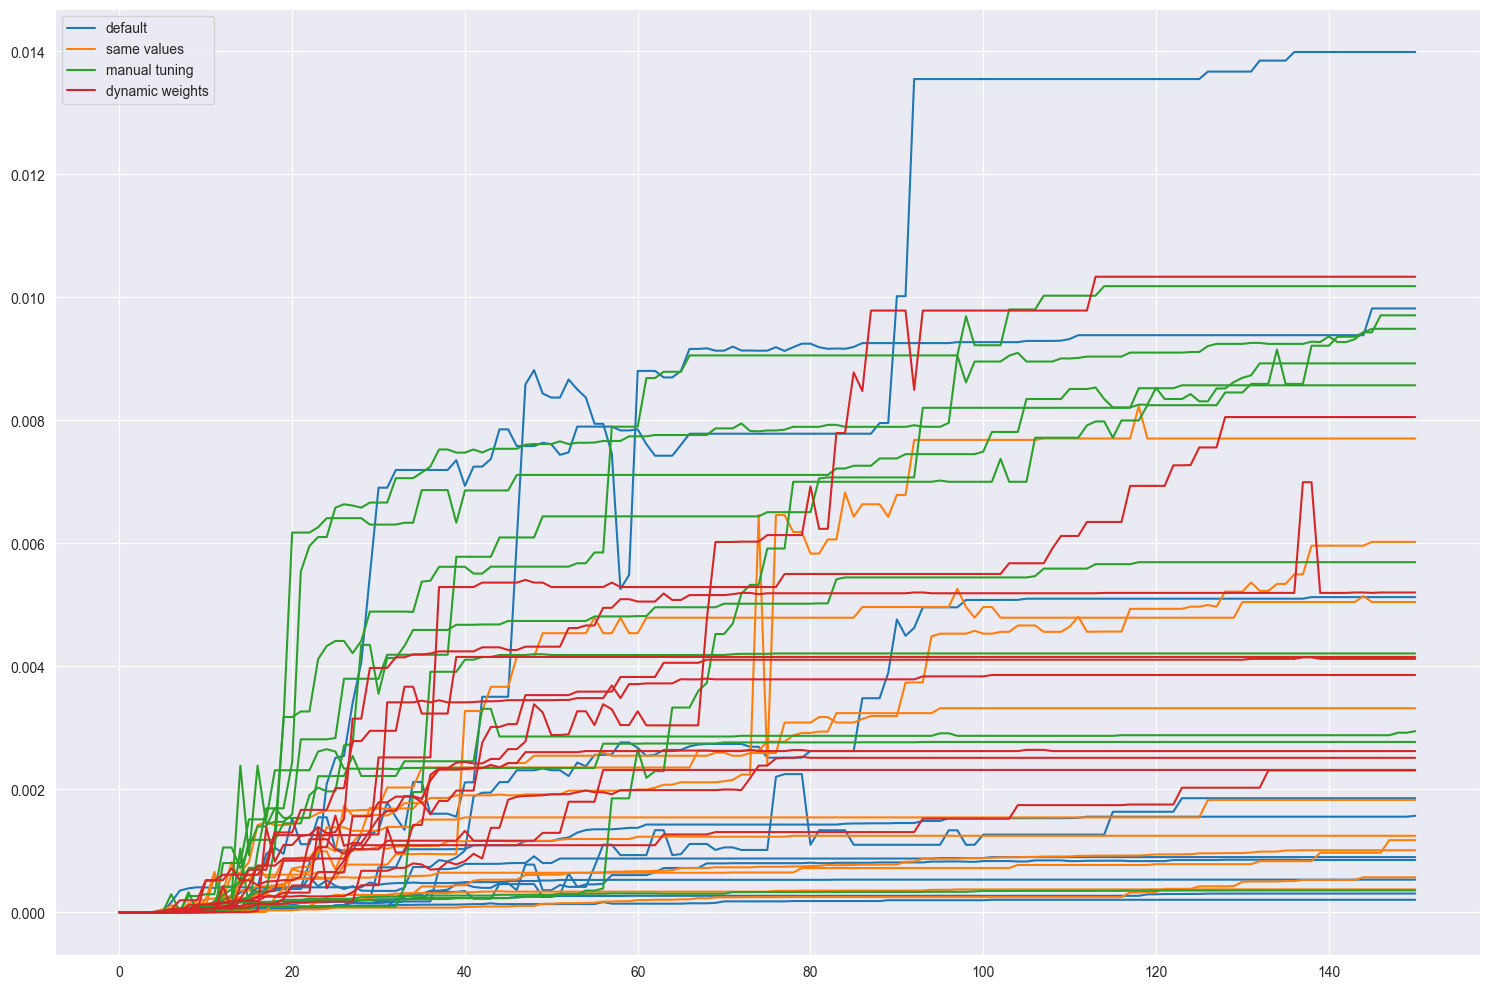

In [11]:
fig = plt.figure(figsize=(15,10))

i = 0

colors = sns.color_palette("tab10", len(run_types))  # Generate colors
fitness_colors = dict(zip(run_types, colors))

ax = fig.add_subplot(1,1,1)

for representation in run_types:
    i += 1

    t_data = data[representation]

    lab = representation

    for m in t_data['max']:
        ax.plot(m, label=lab, color=fitness_colors[representation])

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

fig.tight_layout()


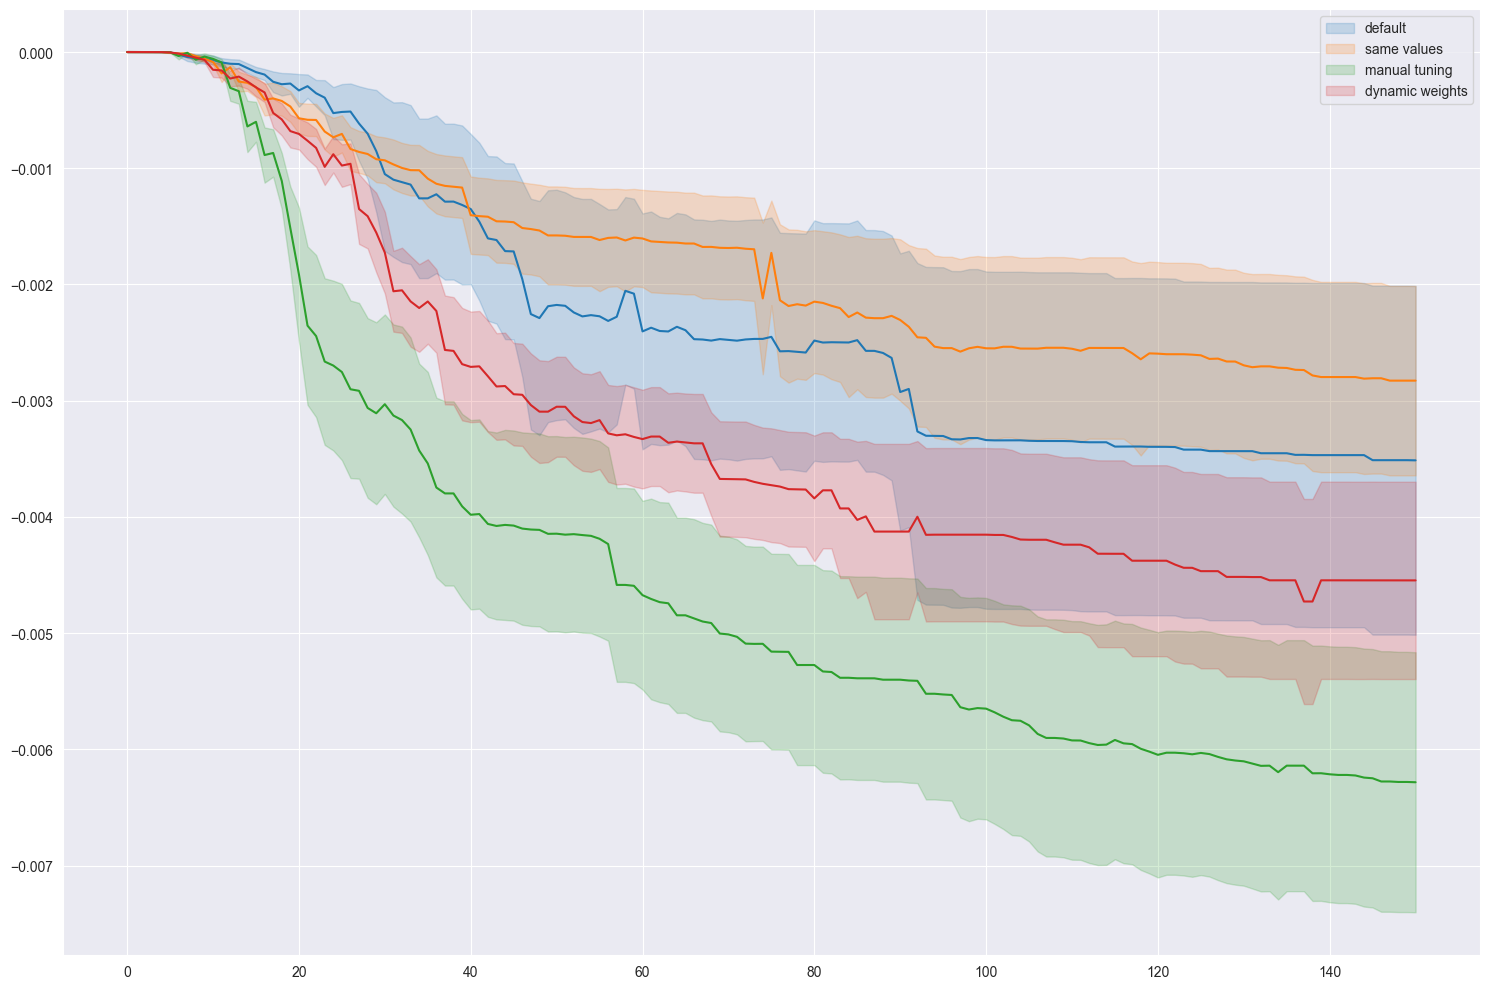

In [13]:
fig = plt.figure(figsize=(15,10))

i = 0

colors = sns.color_palette("tab10", len(run_types))  # Generate colors
fitness_colors = dict(zip(run_types, colors))

ax = fig.add_subplot(1,1,1)

for representation in run_types:

    t_data = data[representation]
    max_data = np.array(t_data['max'])
    avg_mean = -np.mean(max_data, axis=0)
    avg_std = np.std(max_data, axis=0) / 3

    lab = representation

    x = list(range(max_data.shape[1]))

    ax.plot(avg_mean, label=lab, color=fitness_colors[representation])
    ax.fill_between(x, avg_mean-avg_std, avg_mean+avg_std, alpha=0.2, label=lab, color=fitness_colors[representation])

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

fig.tight_layout()


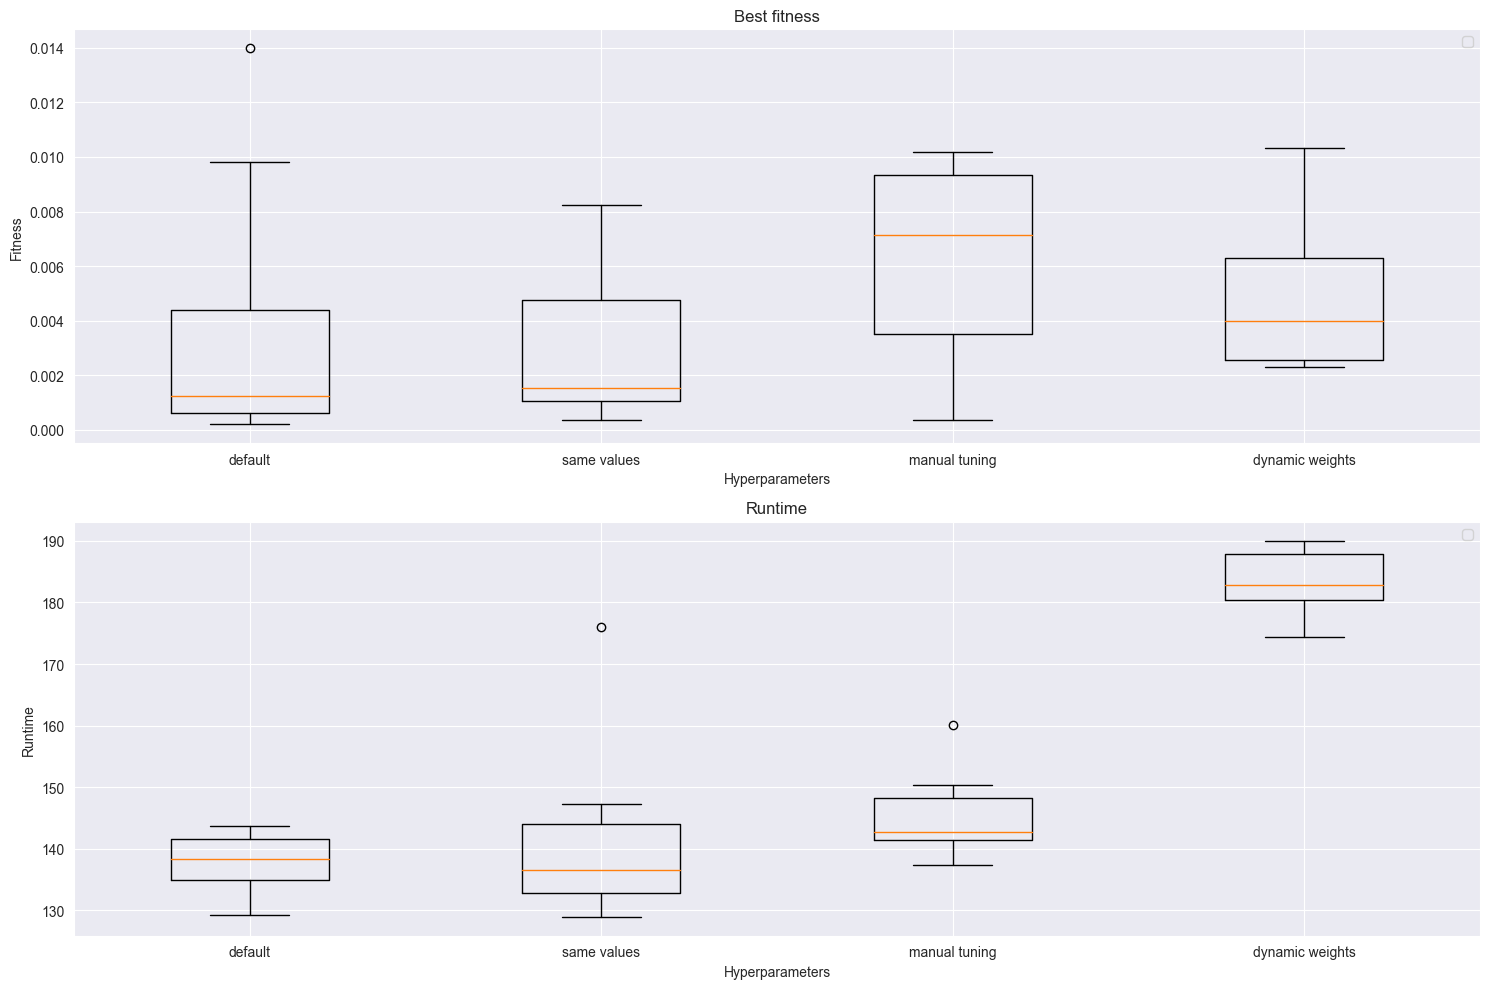

In [16]:
fig = plt.figure(figsize=(15, 10))

i = 0

y = []
x = []
labs = []

i += 1
ax = fig.add_subplot(2,1,i)
ax.set_title('Best fitness')

for representation in run_types:

    t_data = data[representation]
    max_data = np.array(t_data['max'])
    max_es = np.max(max_data, axis=1)

    lab = representation
    labs.append(lab)

    y.append(max_es)
    if len(x) == 0:
        x.append(1)
    else:
        x.append(x[-1] + 1)

ax.boxplot(y,positions=x, labels=labs)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('Fitness')
ax.set_xlabel('Hyperparameters')


y = []
x = []
labs = []

i += 1
ax = fig.add_subplot(2,1,i)
ax.set_title('Runtime')

for representation in run_types:

    t_data = data[representation]
    r_data = np.array(t_data['runtime'])

    lab = representation
    labs.append(lab)

    y.append(r_data)
    if len(x) == 0:
        x.append(1)
    else:
        x.append(x[-1] + 1)

ax.boxplot(y,positions=x, labels=labs)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())
ax.set_ylabel('Runtime')
ax.set_xlabel('Hyperparameters')

fig.tight_layout()
